In [1]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [2]:
# Данный блок в области 1 НЕ выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
# запрещается скрывать предупреждения системы
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
# pip install

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold, StratifiedShuffleSplit
from sklearn.preprocessing import RobustScaler, Normalizer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB


from sklearn.neighbors import KNeighborsRegressor 
from sklearn.model_selection import validation_curve

### Область работы 2 (поиск  модели .... )

In [4]:
# Данный блок(и) НЕ выполняются преподавателем в области 2
# блок(и) предназначены для поиска лучшей модели 
# должен быть понятен и очевиден отбор параметров модели
# оставляйте свои комментарии и разъяснения
# 
# Запрещается размещать данные блоки за пределами обасти 2
# Все блоки данной области должны быть выполнены
#
# ЗАПРЕЩАЕТСЯ ИСПОЛЬЗОВАТЬ ТЕСТОВЫЙ НАБОР
#
# Путь к тренировочному набору
# 

path_train = 'train.csv' # содержит только имя файла, без имен папок !!!
df = pd.read_csv(path_train)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.4,0.17,0.34,1.5,0.091,42.0,135.0,0.99380,3.25,0.49,9.6,7
1,8.0,0.42,0.36,5.0,0.037,34.0,101.0,0.99200,3.13,0.57,12.3,7
2,6.7,0.27,0.25,8.0,0.053,54.0,202.0,0.99610,3.22,0.43,9.3,5
3,5.2,0.21,0.31,1.7,0.048,17.0,61.0,0.98953,3.24,0.37,12.0,7
4,7.6,0.48,0.37,1.2,0.034,5.0,57.0,0.99256,3.05,0.54,10.4,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1720,6.9,0.39,0.22,4.3,0.030,10.0,102.0,0.99300,3.00,0.87,11.6,4
1721,6.4,0.34,0.10,1.1,0.048,19.0,84.0,0.99270,3.21,0.38,9.8,5
1722,7.0,0.53,0.43,6.1,0.029,6.0,76.0,0.99118,3.08,0.50,12.5,8
1723,5.9,0.17,0.29,3.1,0.030,32.0,123.0,0.98913,3.41,0.33,13.7,7


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1725 entries, 0 to 1724
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1725 non-null   float64
 1   volatile acidity      1725 non-null   float64
 2   citric acid           1725 non-null   float64
 3   residual sugar        1725 non-null   float64
 4   chlorides             1725 non-null   float64
 5   free sulfur dioxide   1725 non-null   float64
 6   total sulfur dioxide  1725 non-null   float64
 7   density               1725 non-null   float64
 8   pH                    1725 non-null   float64
 9   sulphates             1725 non-null   float64
 10  alcohol               1725 non-null   float64
 11  quality               1725 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 161.8 KB


In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000
mean,6.821797,0.283849,0.332545,5.725652,0.044460,34.615072,135.248116,0.993532,3.201449,0.492394,10.734348,6.004638
std,0.853886,0.106090,0.122279,4.570812,0.021236,16.751535,42.848854,0.002830,0.151395,0.121452,1.272796,1.071667
min,3.900000,0.085000,0.000000,0.600000,0.012000,3.000000,10.000000,0.987110,2.830000,0.220000,8.400000,3.000000
25%,6.300000,0.210000,0.270000,1.600000,0.034000,23.000000,105.000000,0.991320,3.100000,0.400000,9.600000,5.000000
50%,6.800000,0.270000,0.320000,4.600000,0.041000,33.000000,130.000000,0.993200,3.190000,0.480000,10.600000,6.000000
75%,7.300000,0.330000,0.380000,8.700000,0.049000,45.000000,164.000000,0.995500,3.300000,0.560000,11.700000,7.000000
max,11.800000,1.100000,1.660000,20.700000,0.290000,124.000000,366.500000,1.001820,3.820000,1.080000,14.200000,9.000000


In [7]:
df_train=df.drop_duplicates()
df_train.shape

(1725, 12)

In [8]:
#обозначим за 1 качественные вина
df_train['quality'] = (df_train['quality'] >= 7).astype(int)
df_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.4,0.17,0.34,1.5,0.091,42.0,135.0,0.99380,3.25,0.49,9.6,1
1,8.0,0.42,0.36,5.0,0.037,34.0,101.0,0.99200,3.13,0.57,12.3,1
2,6.7,0.27,0.25,8.0,0.053,54.0,202.0,0.99610,3.22,0.43,9.3,0
3,5.2,0.21,0.31,1.7,0.048,17.0,61.0,0.98953,3.24,0.37,12.0,1
4,7.6,0.48,0.37,1.2,0.034,5.0,57.0,0.99256,3.05,0.54,10.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1720,6.9,0.39,0.22,4.3,0.030,10.0,102.0,0.99300,3.00,0.87,11.6,0
1721,6.4,0.34,0.10,1.1,0.048,19.0,84.0,0.99270,3.21,0.38,9.8,0
1722,7.0,0.53,0.43,6.1,0.029,6.0,76.0,0.99118,3.08,0.50,12.5,1
1723,5.9,0.17,0.29,3.1,0.030,32.0,123.0,0.98913,3.41,0.33,13.7,1


In [9]:
#метод ближайших соседей классификация

In [10]:
df_data=df_train.drop(['quality'],axis=1)
df_target=df_train.quality
X_train,X_test,y_train,y_test=train_test_split(df_data,df_target,random_state=12)
knk = KNeighborsClassifier()
knk.fit(X_train,y_train)

KNeighborsClassifier()

In [11]:
knk_train=knk.score(X_train , y_train)
print("тренировочный: {:.3f}".format(knk_train))

тренировочный: 0.792


C:\Users\Gra4e\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [12]:
knk = KNeighborsClassifier()
param_grid = [{
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'p': [1,2,3]
}]

cv = KFold()

grid = GridSearchCV(knk, param_grid, cv = cv, return_train_score = True)
grid.fit(X_train, y_train)
grid

C:\Users\Gra4e\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Gra4e\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20],
                          'p': [1, 2, 3]}],
             return_train_score=True)

In [13]:
grid.cv_results_

{'mean_fit_time': array([0.00248265, 0.00267291, 0.00112276, 0.00352817, 0.00484471,
        0.00080719, 0.00215063, 0.00200191, 0.00261874, 0.00075727,
        0.00125937, 0.00168343, 0.00157018, 0.00694623, 0.00448604,
        0.00147462, 0.00140295, 0.00070519, 0.00381956, 0.00071654,
        0.00100026, 0.00092301, 0.00074182, 0.00333438, 0.00146208,
        0.00111027, 0.00175333, 0.        , 0.00718384, 0.00123   ,
        0.00160446, 0.00181508, 0.00179868, 0.00180297, 0.00430074,
        0.00386329, 0.00856781, 0.00358992, 0.00570464, 0.0018075 ,
        0.00430779, 0.00060267, 0.00161748, 0.00094967, 0.00132031,
        0.00124674, 0.00104375, 0.00296292, 0.00120263, 0.00119534,
        0.0011992 , 0.00169139, 0.00140047, 0.00103965, 0.00079823,
        0.00311022, 0.0018868 , 0.00408125, 0.00302267, 0.00257702]),
 'std_fit_time': array([0.00041427, 0.00046109, 0.0009771 , 0.00610541, 0.00559061,
        0.0009886 , 0.00029235, 0.00035081, 0.00220097, 0.0009341 ,
        0.001

In [14]:
best_model = grid.best_estimator_
best_model

KNeighborsClassifier(n_neighbors=16, p=1)

In [15]:
knk_final = KNeighborsClassifier(n_neighbors=16, p=1)
knk_final.fit(X_train,y_train)
print('Оценка на тренировочном наборе: ', knk_final.score(X_train,y_train))

Оценка на тренировочном наборе:  0.748646558391338


C:\Users\Gra4e\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [16]:
#метод логистической регрессии

In [17]:
clf = LogisticRegression(random_state=42, penalty='none').fit(X_train, y_train)

clf.predict(X_train)
clf.score(X_train, y_train)

C:\Users\Gra4e\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7563805104408353

In [18]:
pipe = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('clf',           LogisticRegression())])

cv = StratifiedShuffleSplit(test_size = .3, train_size = .6, n_splits = 5, random_state = 42)
scaling = [ MinMaxScaler(), StandardScaler(),RobustScaler(), Normalizer()]

param_grid =[
    {'preprocessing': scaling,'clf__penalty': ['l2'], 
         'clf__solver': ['newton-cg' ,'lbfgs', 'liblinear', 'sag', 'saga']},
    {'preprocessing': scaling,'clf__penalty': ['l1'], 
         'clf__solver': ['liblinear']},
    {'preprocessing': scaling,'clf__penalty': ['none'], 
         'clf__solver': ['lbfgs','newton-cg']}
    ]

grid = GridSearchCV(pipe, param_grid, cv = cv, return_train_score = True)
grid.fit(X_train, y_train)
grid    

C:\Users\Gra4e\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Gra4e\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Gra4e\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Gra4e\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Gra4e\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Gra4e\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.3,
            train_size=0.6),
             estimator=Pipeline(steps=[('preprocessing', MinMaxScaler()),
                                       ('clf', LogisticRegression())]),
             param_grid=[{'clf__penalty': ['l2'],
                          'clf__solver': ['newton-cg', 'lbfgs', 'liblinear',
                                          'sag', 'saga'],
                          'preprocessing': [MinMaxScaler(), StandardScaler(),
                                            RobustScaler(), Normalizer()]},
                         {'clf__penalty': ['l1'], 'clf__solver': ['liblinear'],
                          'preprocessing': [MinMaxScaler(), StandardScaler(),
                                            RobustScaler(), Normalizer()]},
                         {'clf__penalty': ['none'],
                          'clf__solver': ['lbfgs', 'newton-cg'],
                          'preprocessing': [MinMaxSc

In [19]:
grid_result = pd.DataFrame(grid.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result

,24,25,26,28,29,30,9,21,31,1,...,22,8,20,27,23,11,3,7,15,19
mean_fit_time,0.010525,0.005927,0.007663,0.009157,0.006887,0.011133,0.004778,0.005639,0.047795,0.009522,...,0.0065,0.004419,0.010103,0.018459,0.009959,0.00725,0.006275,0.008892,0.003358,0.005639
std_fit_time,0.000459,0.00054,0.000375,0.000655,0.001905,0.007718,0.002666,0.003078,0.002932,0.002405,...,0.000886,0.000459,0.001976,0.000651,0.003336,0.00308,0.000934,0.000775,0.004494,0.001897
mean_score_time,0.000707,0.001153,0.001459,0.001094,0.0008,0.000489,0.00081,0.001139,0.000608,0.001514,...,0.001206,0.001609,0.00098,0.001219,0.001599,0.000869,0.00132,0.001407,0.000514,0.000929
std_score_time,0.000403,0.00049,0.00039,0.00018,0.0004,0.000598,0.00076,0.000773,0.000496,0.000644,...,0.000397,0.000494,0.000635,0.00039,0.000484,0.000819,0.000625,0.000493,0.000651,0.00066
param_clf__penalty,none,none,none,none,none,none,l2,l1,none,l2,...,l1,l2,l1,none,l1,l2,l2,l2,l2,l2
param_clf__solver,lbfgs,lbfgs,lbfgs,newton-cg,newton-cg,newton-cg,liblinear,liblinear,newton-cg,newton-cg,...,liblinear,liblinear,liblinear,lbfgs,liblinear,liblinear,newton-cg,lbfgs,sag,saga
param_preprocessing,MinMaxScaler(),StandardScaler(),RobustScaler(),MinMaxScaler(),StandardScaler(),RobustScaler(),StandardScaler(),StandardScaler(),Normalizer(),StandardScaler(),...,RobustScaler(),MinMaxScaler(),MinMaxScaler(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer()
params,"{'clf__penalty': 'none', 'clf__solver': 'lbfgs...","{'clf__penalty': 'none', 'clf__solver': 'lbfgs...","{'clf__penalty': 'none', 'clf__solver': 'lbfgs...","{'clf__penalty': 'none', 'clf__solver': 'newto...","{'clf__penalty': 'none', 'clf__solver': 'newto...","{'clf__penalty': 'none', 'clf__solver': 'newto...","{'clf__penalty': 'l2', 'clf__solver': 'libline...","{'clf__penalty': 'l1', 'clf__solver': 'libline...","{'clf__penalty': 'none', 'clf__solver': 'newto...","{'clf__penalty': 'l2', 'clf__solver': 'newton-...",...,"{'clf__penalty': 'l1', 'clf__solver': 'libline...","{'clf__penalty': 'l2', 'clf__solver': 'libline...","{'clf__penalty': 'l1', 'clf__solver': 'libline...","{'clf__penalty': 'none', 'clf__solver': 'lbfgs...","{'clf__penalty': 'l1', 'clf__solver': 'libline...","{'clf__penalty': 'l2', 'clf__solver': 'libline...","{'clf__penalty': 'l2', 'clf__solver': 'newton-...","{'clf__penalty': 'l2', 'clf__solver': 'lbfgs',...","{'clf__penalty': 'l2', 'clf__solver': 'sag', '...","{'clf__penalty': 'l2', 'clf__solver': 'saga', ..."
split0_test_score,0.78866,0.78866,0.78866,0.78866,0.78866,0.78866,0.791237,0.78866,0.796392,0.791237,...,0.786082,0.780928,0.786082,0.780928,0.626289,0.626289,0.626289,0.626289,0.626289,0.626289
split1_test_score,0.783505,0.783505,0.783505,0.783505,0.783505,0.783505,0.780928,0.780928,0.783505,0.778351,...,0.773196,0.757732,0.755155,0.75,0.618557,0.626289,0.626289,0.626289,0.626289,0.626289


<AxesSubplot:>

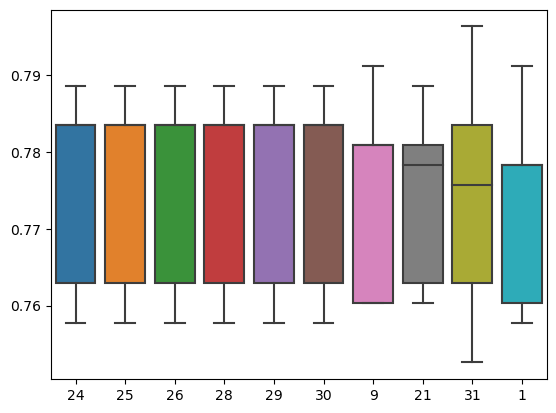

In [20]:
mask = grid_result.index[grid_result.index.str.endswith("_test_score")][:-3]
tabl = grid_result.loc[mask].iloc[:,:10]
sns.boxplot(data=tabl)

In [21]:
grid.cv_results_['params'][24]

{'clf__penalty': 'none',
 'clf__solver': 'lbfgs',
 'preprocessing': MinMaxScaler()}

In [22]:
pipe_best = make_pipeline(Normalizer(), LogisticRegression(solver = 'lbfgs', penalty = 'none') )

pipe_best.fit(X_train,y_train)
y_pred_best = pipe_best.predict(X_test)
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       291
           1       0.67      0.48      0.56       141

    accuracy                           0.75       432
   macro avg       0.72      0.68      0.69       432
weighted avg       0.74      0.75      0.74       432



C:\Users\Gra4e\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
#байесовский классификатор

In [24]:
pipe = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('clf',           GaussianNB())])

cv = StratifiedShuffleSplit(test_size = .3, train_size = .6, n_splits = 5, random_state = 42)
scaling = [ MinMaxScaler(), StandardScaler(),RobustScaler(), Normalizer()]

param_grid =[
    {'preprocessing': scaling, 
     'clf': [GaussianNB()]}
    ]

grid = GridSearchCV(pipe, param_grid, cv = cv, return_train_score = True)
grid.fit(X_train, y_train)
grid 

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.3,
            train_size=0.6),
             estimator=Pipeline(steps=[('preprocessing', MinMaxScaler()),
                                       ('clf', GaussianNB())]),
             param_grid=[{'clf': [GaussianNB()],
                          'preprocessing': [MinMaxScaler(), StandardScaler(),
                                            RobustScaler(), Normalizer()]}],
             return_train_score=True)

In [25]:
grid_result = pd.DataFrame(grid.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result

,0,1,2,3
mean_fit_time,0.003134,0.002498,0.004047,0.002434
std_fit_time,0.000702,0.000415,0.000608,0.000495
mean_score_time,0.001238,0.000898,0.001245,0.001037
std_score_time,0.000401,0.000652,0.000466,0.000033
param_clf,GaussianNB(),GaussianNB(),GaussianNB(),GaussianNB()
param_preprocessing,MinMaxScaler(),StandardScaler(),RobustScaler(),Normalizer()
params,"{'clf': GaussianNB(), 'preprocessing': MinMaxS...","{'clf': GaussianNB(), 'preprocessing': Standar...","{'clf': GaussianNB(), 'preprocessing': RobustS...","{'clf': GaussianNB(), 'preprocessing': Normali..."
split0_test_score,0.708763,0.708763,0.708763,0.659794
split1_test_score,0.731959,0.731959,0.731959,0.636598
split2_test_score,0.742268,0.742268,0.742268,0.677835


In [26]:
print(grid.best_estimator_)

Pipeline(steps=[('preprocessing', MinMaxScaler()), ('clf', GaussianNB())])


In [27]:
pipe_best = Pipeline(steps=[('preprocessing', Normalizer()), ('clf', GaussianNB())])
pipe_best.fit(X_train,y_train)
y_best = pipe_best.predict(X_test)

print(classification_report(y_test, y_best))

              precision    recall  f1-score   support

           0       0.84      0.58      0.68       291
           1       0.47      0.77      0.58       141

    accuracy                           0.64       432
   macro avg       0.65      0.67      0.63       432
weighted avg       0.72      0.64      0.65       432

